In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import scipy
import warnings
import plotly.express as px
import statsmodels.api as sm
from itertools import product
from tqdm import tqdm
warnings.filterwarnings('ignore')
date_cols = ['date']

In [2]:
df = pd.read_csv(r'C:\Users\Divyanshu Chaudhari\Downloads\country_vaccinations_new.csv',parse_dates = date_cols)

In [3]:
df.tail()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
18759,Zimbabwe,ZWE,2021-05-14,775241.0,571460.0,203781.0,23221.0,19211.0,5.22,3.84,1.37,1293.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1394757158...
18760,Zimbabwe,ZWE,2021-05-15,793311.0,579769.0,213542.0,18070.0,19353.0,5.34,3.90,1.44,1302.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1394757158...
18761,Zimbabwe,ZWE,2021-05-16,796947.0,581615.0,215332.0,3636.0,16101.0,5.36,3.91,1.45,1083.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1394757158...
18762,Zimbabwe,ZWE,2021-05-17,814258.0,591808.0,222450.0,17311.0,17658.0,5.48,3.98,1.50,1188.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1394757158...
18763,Zimbabwe,ZWE,2021-05-18,831954.0,600579.0,231375.0,17696.0,17455.0,5.60,4.04,1.56,1174.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1394757158...


In [4]:
df.head(5)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/


# Data Cleaning

In [5]:
df.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [6]:
df.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                      7969
people_vaccinated                       8726
people_fully_vaccinated                11097
daily_vaccinations_raw                  9766
daily_vaccinations                       213
total_vaccinations_per_hundred          7969
people_vaccinated_per_hundred           8726
people_fully_vaccinated_per_hundred    11097
daily_vaccinations_per_million           213
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [7]:
df.shape

(18764, 15)

In [8]:
#Droppin total_vaccinations missing data, as without this value any raw doesn't make much sense.
df = df.drop(df[df.total_vaccinations.isna()].index)

In [9]:
df.shape

(10795, 15)

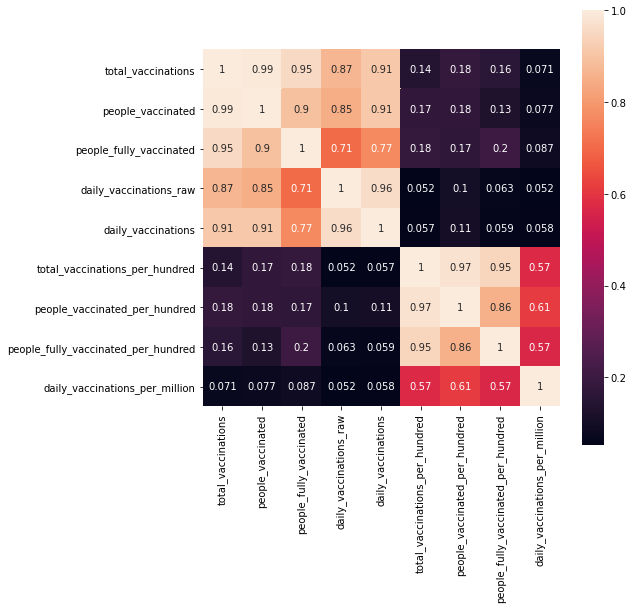

In [10]:
plt.subplots(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, square=True)
plt.show()

The values of total_vaccinations column are strongly correlated with people_vaccinated column's.4

In [11]:
df.isna().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                        0
people_vaccinated                       844
people_fully_vaccinated                3129
daily_vaccinations_raw                 1797
daily_vaccinations                      211
total_vaccinations_per_hundred            0
people_vaccinated_per_hundred           844
people_fully_vaccinated_per_hundred    3129
daily_vaccinations_per_million          211
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [12]:
#df_copy = df.copy()

In [13]:
#df_copy = df_copy.drop(df_copy[df_copy.people_vaccinated.isna()].index)

In [14]:
#Let's check the hypothesis that these columns distributions are the same.
#We will use Mann-Whithey U test for this goal.

In [15]:
scipy.stats.mannwhitneyu(df.total_vaccinations, df.people_vaccinated, alternative='two-sided')

MannwhitneyuResult(statistic=56890750.5, pvalue=0.0026695698080454987)

As p-value is less than 0.05, which means we reject our hyphotesis.
So, we will fill the missing values with 0.

In [16]:
df.people_vaccinated = df.people_vaccinated.fillna(0)

In [17]:
df.isna().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                        0
people_vaccinated                         0
people_fully_vaccinated                3129
daily_vaccinations_raw                 1797
daily_vaccinations                      211
total_vaccinations_per_hundred            0
people_vaccinated_per_hundred           844
people_fully_vaccinated_per_hundred    3129
daily_vaccinations_per_million          211
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

Other Strong correlations that we identify from the above heatmap are:

2.total_vaccinations_per_hundred vs people_vaccinated_per_hundred
3.daily_vaccinations vs  people_vaccinated
4.daily_vaccinations_per_million vs people_vaccinated_per_hundred
5.people_fully_vaccinated vs  total_vaccinations
6.people_fully_vaccinated_per_hundred vs total_vaccinations_per_hundred
7.daily_vaccinations_raw vs daily_vaccinations

In [18]:
scipy.stats.mannwhitneyu(df.total_vaccinations_per_hundred, df.people_vaccinated_per_hundred, alternative='two-sided')

MannwhitneyuResult(statistic=57905856.5, pvalue=0.4315482792032509)

In [19]:
#df.people_vaccinated_per_hundred = df.people_vaccinated_per_hundred.fillna(0)
diff_per_hundred = df.total_vaccinations_per_hundred.mean() - df.people_vaccinated_per_hundred.mean()
df.people_vaccinated_per_hundred = df.people_vaccinated_per_hundred.fillna(df.total_vaccinations_per_hundred - diff_per_hundred)

In [20]:
scipy.stats.mannwhitneyu(df.daily_vaccinations, df.people_vaccinated, alternative='two-sided')

MannwhitneyuResult(statistic=29366750.0, pvalue=0.0)

In [21]:
df.daily_vaccinations = df.daily_vaccinations.fillna(0)

In [22]:
scipy.stats.mannwhitneyu(df.daily_vaccinations_per_million, df.people_vaccinated_per_hundred, alternative='two-sided')

MannwhitneyuResult(statistic=114912595.5, pvalue=0.0)

In [23]:
df.daily_vaccinations_per_million = df.daily_vaccinations_per_million.fillna(0)

In [24]:
scipy.stats.mannwhitneyu(df.people_fully_vaccinated, df.total_vaccinations, alternative='two-sided')

MannwhitneyuResult(statistic=66328301.0, pvalue=2.169668356818736e-69)

In [25]:
df.people_fully_vaccinated = df.people_fully_vaccinated.fillna(0)

In [26]:
scipy.stats.mannwhitneyu(df.people_fully_vaccinated_per_hundred, df.total_vaccinations_per_hundred, alternative='two-sided')

MannwhitneyuResult(statistic=62889277.0, pvalue=5.70888857535949e-24)

In [27]:
df.people_fully_vaccinated_per_hundred = df.people_fully_vaccinated_per_hundred.fillna(0)

In [28]:
scipy.stats.mannwhitneyu(df.daily_vaccinations_raw, df.daily_vaccinations, alternative='two-sided')

MannwhitneyuResult(statistic=70580864.0, pvalue=2.5516766302881847e-159)

In [29]:
df.daily_vaccinations_raw = df.daily_vaccinations_raw.fillna(0)

In [30]:
df.isna().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

In [31]:
df.shape

(10795, 15)

In [32]:
df.dtypes

country                                        object
iso_code                                       object
date                                   datetime64[ns]
total_vaccinations                            float64
people_vaccinated                             float64
people_fully_vaccinated                       float64
daily_vaccinations_raw                        float64
daily_vaccinations                            float64
total_vaccinations_per_hundred                float64
people_vaccinated_per_hundred                 float64
people_fully_vaccinated_per_hundred           float64
daily_vaccinations_per_million                float64
vaccines                                       object
source_name                                    object
source_website                                 object
dtype: object

## How the vaccinations progress changes over time

In [230]:
t_cols = ['date','total_vaccinations']
timeseries = df[t_cols].groupby('date').sum()[4:-1]
timeseries = pd.DataFrame(timeseries)
print(timeseries)

            total_vaccinations
date                          
2020-12-06        2.000000e+00
2020-12-07        4.000000e+00
2020-12-08        4.000000e+00
2020-12-09        5.000000e+00
2020-12-10        6.000000e+00
...                        ...
2021-05-13        1.394810e+09
2021-05-14        1.376011e+09
2021-05-15        1.380323e+09
2021-05-16        1.465803e+09
2021-05-17        1.497409e+09

[163 rows x 1 columns]


In [231]:
#timeseries = timeseries.set_index('date')
timeseries.shape

(163, 1)

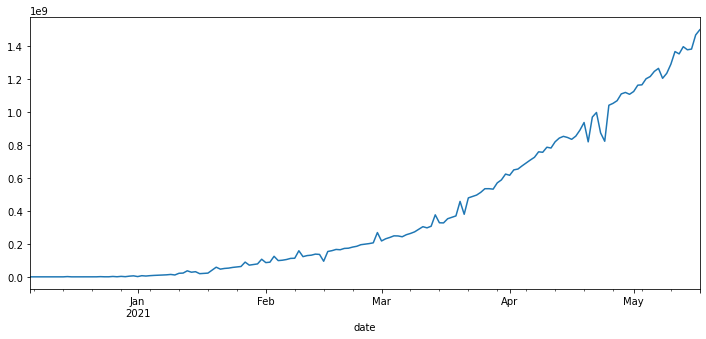

In [232]:
timeseries['total_vaccinations'].plot(figsize=(12,5))

#### What can bee seen, is that despite some days the amount of vaccinated people falls, the vaccination has strong long uptrend.


# Timeseries transformations to make it stationary

#### Testing For Stationarity using Dickey-Fuller Test

In [233]:
from statsmodels.tsa.stattools import adfuller

In [234]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [235]:
adfuller_test(timeseries['total_vaccinations'])

ADF Test Statistic : 6.240511150727797
p-value : 1.0
#Lags Used : 5
Number of Observations Used : 157
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [236]:
# create a differenced series
# def difference(timeseries, interval=1):
# 	diff = list()
# 	for i in range(interval, len(timeseries)):
# 		value = timeseries[i] - timeseries[i - interval]
# 		diff.append(value)
# 	return diff

# # invert differenced forecast
# def inverse_difference(last_ob, value):
# 	return value + last_ob

# # define a dataset with a linear trend
# #data = [i+1 for i in range(20)]
# #print(data)
# # difference the dataset
# diff1 = difference(timeseries)
# print(diff1)
# # invert the difference
# inverted = [inverse_difference(timeseries[i], diff1[i]) for i in range(len(diff))]
# print(inverted)

In [237]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [238]:
stepwise_fit = auto_arima(timeseries['total_vaccinations'], 
                          suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  163
Model:               SARIMAX(3, 2, 4)   Log Likelihood               -2985.778
Date:                Fri, 25 Jun 2021   AIC                           5987.557
Time:                        16:25:03   BIC                           6012.208
Sample:                             0   HQIC                          5997.566
                                - 163                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2107      0.111    -10.897      0.000      -1.428      -0.993
ar.L2         -0.8227      0.104     -7.922      0.000      -1.026      -0.619
ar.L3         -0.1497      0.089     -1.674      0.094      -0.325       0.026
ma.L1         -0.2771      0.122     -2.275      0.023      -0.516      -0.038
ma.L2         -0.7653      0.125     -6.117      0.000      -1.010      -0.520
ma.L3         -0.4200      0.106     -3.976      0.000      -0.627      -0.213
ma.L4          0.5816      0.107      5.433      0.000       0.372       0.791
sigma2      8.429e+14    1.6e-16   5.27e+30      0.000    8.43e+14    8.43e+14
===================================================================================
Ljung-Box (Q):                       36.54   Jarque-Bera (JB):               136.86
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):              34.03   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.18e+46. Standard errors may be unstable.
"""

In [239]:
from statsmodels.tsa.arima_model import ARIMA

In [240]:
print(timeseries.shape)
train=timeseries.iloc[:]
#test=timeseries.iloc[60:]
print(train.shape,timeseries.shape)
#print(test.iloc[0],test.iloc[-1])

(163, 1)
(163, 1) (163, 1)


In [241]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['total_vaccinations'],order=(3, 2, 4))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARIMA Model Results                               
=================================================================================
Dep. Variable:     D2.total_vaccinations   No. Observations:                  161
Model:                    ARIMA(3, 2, 4)   Log Likelihood               -2983.819
Method:                          css-mle   S.D. of innovations       26582122.251
Date:                   Fri, 25 Jun 2021   AIC                           5985.639
Time:                           16:25:04   BIC                           6013.371
Sample:                       12-08-2020   HQIC                          5996.899
                            - 05-17-2021                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        1.963e+05        nan        nan        nan         nan         nan
ar.L1.D2.total_vaccinations    -1.2332      0.110    -11.235      0.000      -1.448      -1.018
ar.L2.D2.total_vaccinations    -0.8501      0.128     -6.667      0.000      -1.100      -0.600
ar.L3.D2.total_vaccinations    -0.1693      0.102     -1.657      0.098      -0.370       0.031
ma.L1.D2.total_vaccinations    -0.2820      0.100     -2.829      0.005      -0.477      -0.087
ma.L2.D2.total_vaccinations    -0.7844      0.099     -7.956      0.000      -0.978      -0.591
ma.L3.D2.total_vaccinations    -0.4397      0.097     -4.541      0.000      -0.630      -0.250
ma.L4.D2.total_vaccinations     0.5646      0.086      6.560      0.000       0.396       0.733
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.8182           -1.0370j            1.3210           -0.3563
AR.2           -0.8182           +1.0370j            1.3210            0.3563
AR.3           -3.3854           -0.0000j            3.3854           -0.5000
MA.1           -0.8319           -0.7164j            1.0979           -0.3868
MA.2           -0.8319           +0.7164j            1.0979            0.3868
MA.3            1.0723           -0.0000j            1.0723           -0.0000
MA.4            1.3704           -0.0000j            1.3704           -0.0000
-----------------------------------------------------------------------------
"""

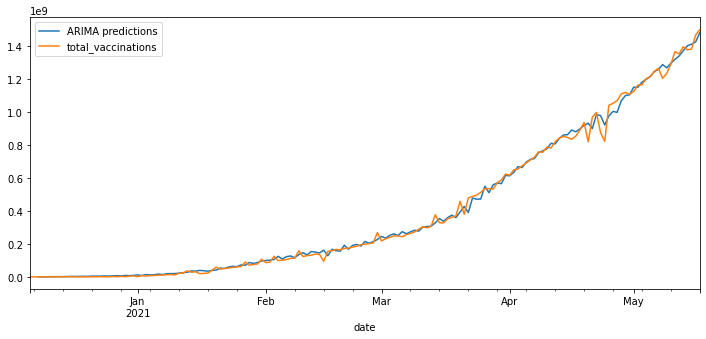

In [242]:
start=2
end=len(timeseries)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
pred.plot(legend=True)
timeseries['total_vaccinations'].plot(figsize=(12,5),legend=True)

In [243]:
train['total_vaccinations'].mean()

396243661.71165645

In [244]:
model2=ARIMA(timeseries['total_vaccinations'],order=(3,2,4))
model2=model2.fit()
timeseries.tail()

,total_vaccinations
date,
2021-05-13,1.394810e+09
2021-05-14,1.376011e+09
2021-05-15,1.380323e+09
2021-05-16,1.465803e+09
2021-05-17,1.497409e+09


In [245]:
index_future_dates=pd.date_range(start='2021-05-17',end='2021-06-16')
print(index_future_dates)
pred=model2.predict(start=len(timeseries),end=len(timeseries)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

DatetimeIndex(['2021-05-17', '2021-05-18', '2021-05-19', '2021-05-20',
               '2021-05-21', '2021-05-22', '2021-05-23', '2021-05-24',
               '2021-05-25', '2021-05-26', '2021-05-27', '2021-05-28',
               '2021-05-29', '2021-05-30', '2021-05-31', '2021-06-01',
               '2021-06-02', '2021-06-03', '2021-06-04', '2021-06-05',
               '2021-06-06', '2021-06-07', '2021-06-08', '2021-06-09',
               '2021-06-10', '2021-06-11', '2021-06-12', '2021-06-13',
               '2021-06-14', '2021-06-15', '2021-06-16'],
              dtype='datetime64[ns]', freq='D')
2021-05-17    1.484286e+09
2021-05-18    1.509383e+09
2021-05-19    1.550509e+09
2021-05-20    1.558108e+09
2021-05-21    1.587595e+09
2021-05-22    1.616516e+09
2021-05-23    1.633842e+09
2021-05-24    1.662882e+09
2021-05-25    1.688068e+09
2021-05-26    1.710650e+09
2021-05-27    1.738375e+09
2021-05-28    1.763261e+09
2021-05-29    1.788355e+09
2021-05-30    1.815374e+09
2021-05-31    1.840

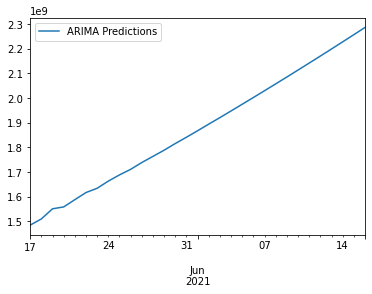

In [246]:
pred.plot(legend=True)

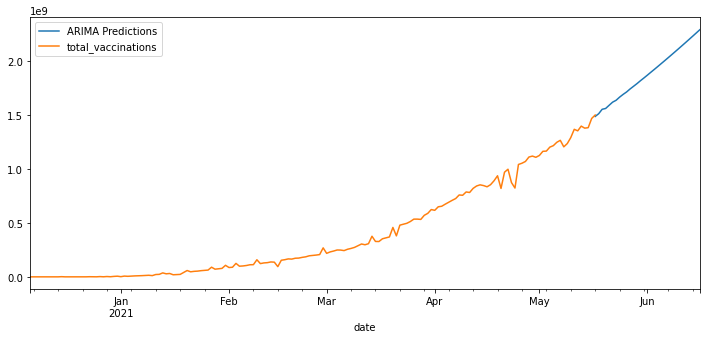

In [247]:
pred.plot(figsize=(12,5),legend=True)
timeseries['total_vaccinations'].plot(figsize=(12,5),legend=True)